<a href="https://colab.research.google.com/github/SaraBabakN/Model-Search/blob/master/Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data

In [ ]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [ ]:
lr = 0.005
batch_size = 64
dataset_size = 50000
epoch_num = 120

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),transforms.RandomHorizontalFlip(),transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

train_set = torchvision.datasets.CIFAR10('./datasets', train=True, download=True,transform=transform_train)
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

transform_test = transforms.Compose([transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

test_set = torchvision.datasets.CIFAR10('./datasets', train=False, download=True,transform=transform_test)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

In [ ]:
N1 = torch.load('/path/to/model1')
N2 = torch.load('/path/to/mode2')
N3 = torch.load('/path/to/model3')

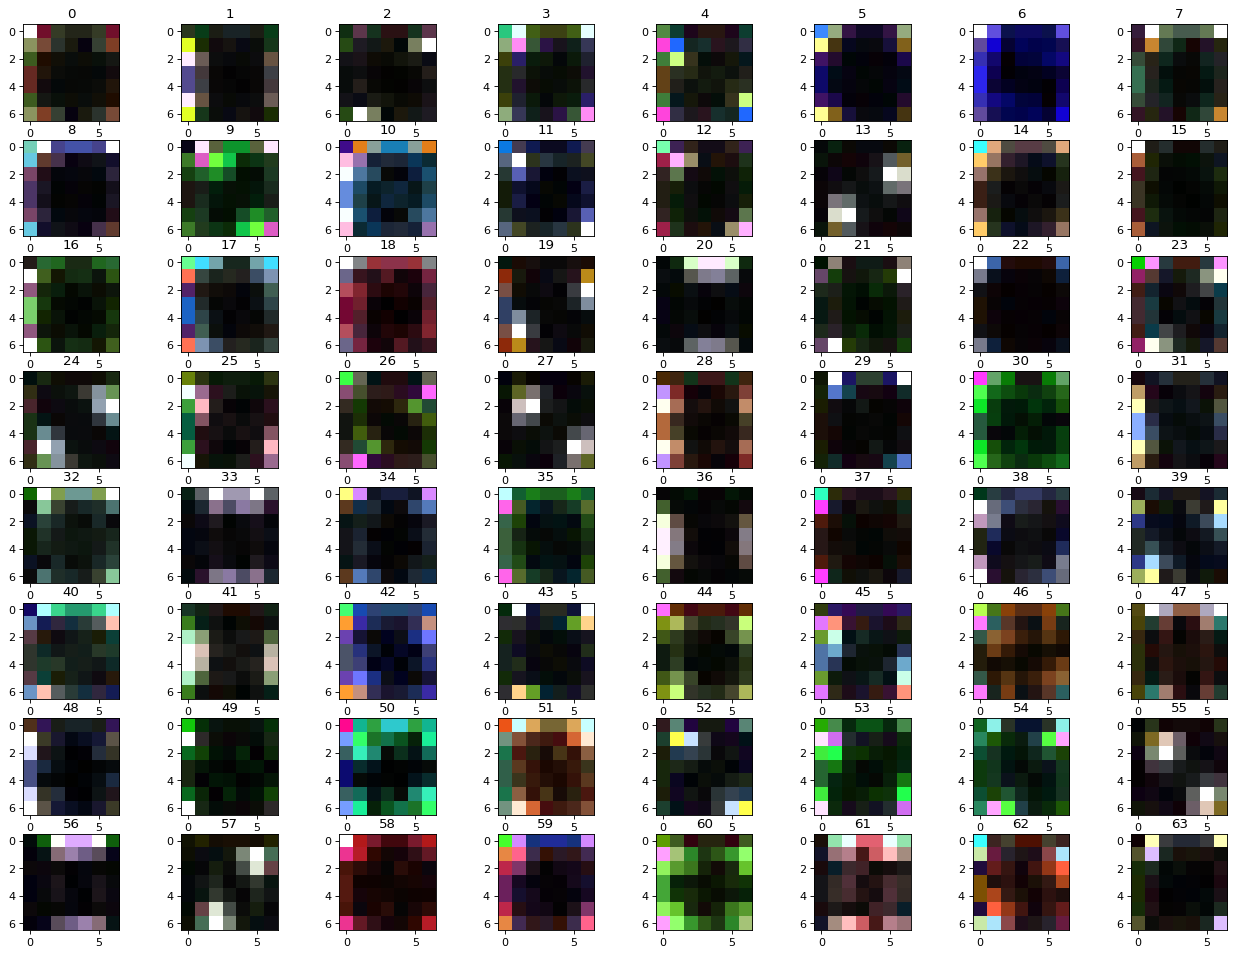

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=8,figsize=(20,15), dpi=80)
conv = N1.conv1.weight.clone().detach().cpu()
i = 0

for ax in axes.flat:

  a = np.fft.fft2(conv[i][0])
  b = np.fft.fft2(conv[i][1])
  c = np.fft.fft2(conv[i][2])

  x = abs(np.stack((a,b,c), axis=2))
  im = ax.imshow(np.divide (x ,np.amax(x , axis= (0,1)))) 
  ax.set_title(str(i))
  i= i+1

plt.show()

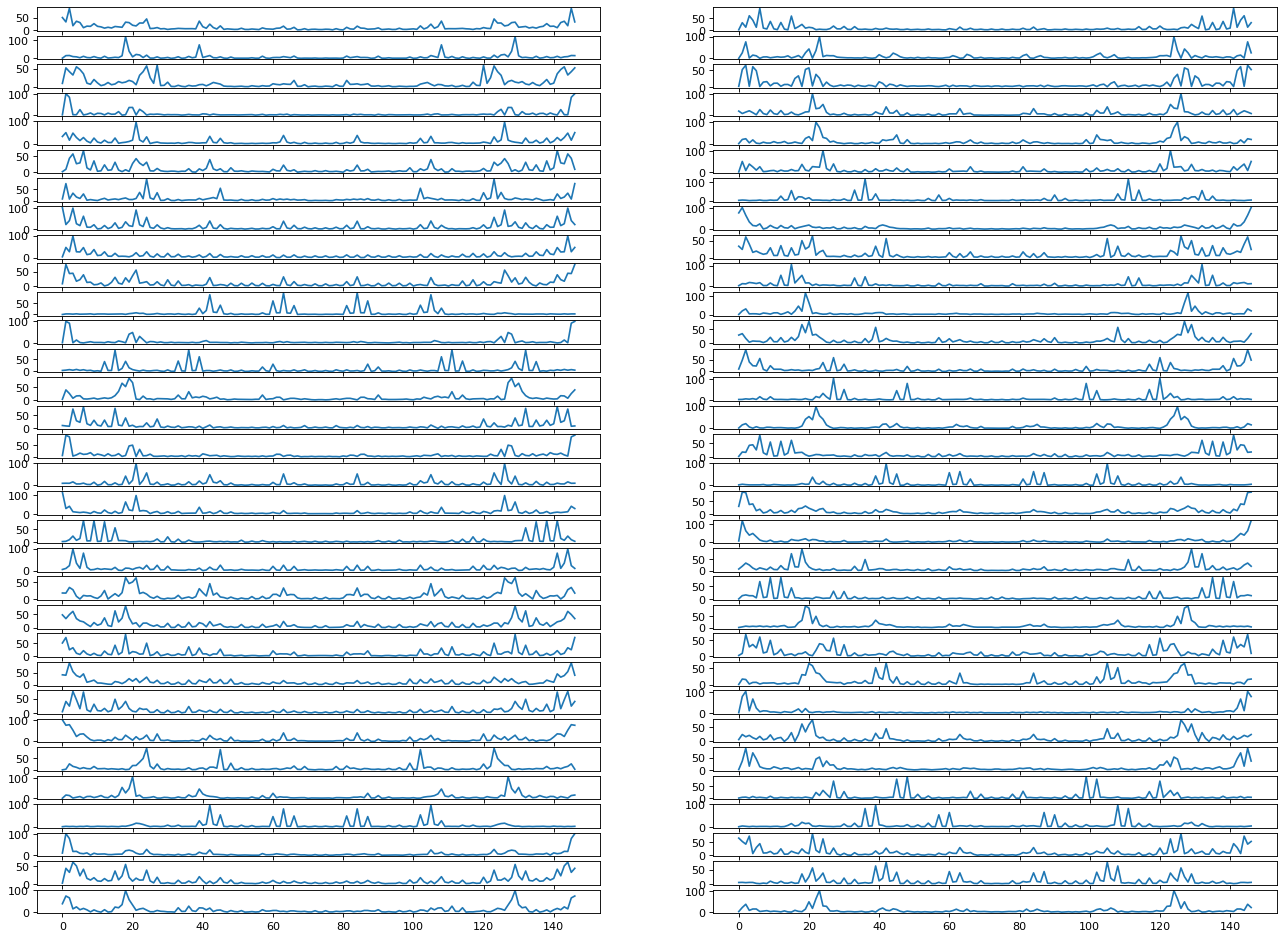

In [ ]:
fig = plt.figure(figsize=(20,15), dpi=80) 
for i in range(64): 
  ax = fig.add_subplot(32,2,i+1)
  ax.plot(abs(np.fft.fft(N1.conv1.weight[i].clone().detach().cpu().reshape(-1))))

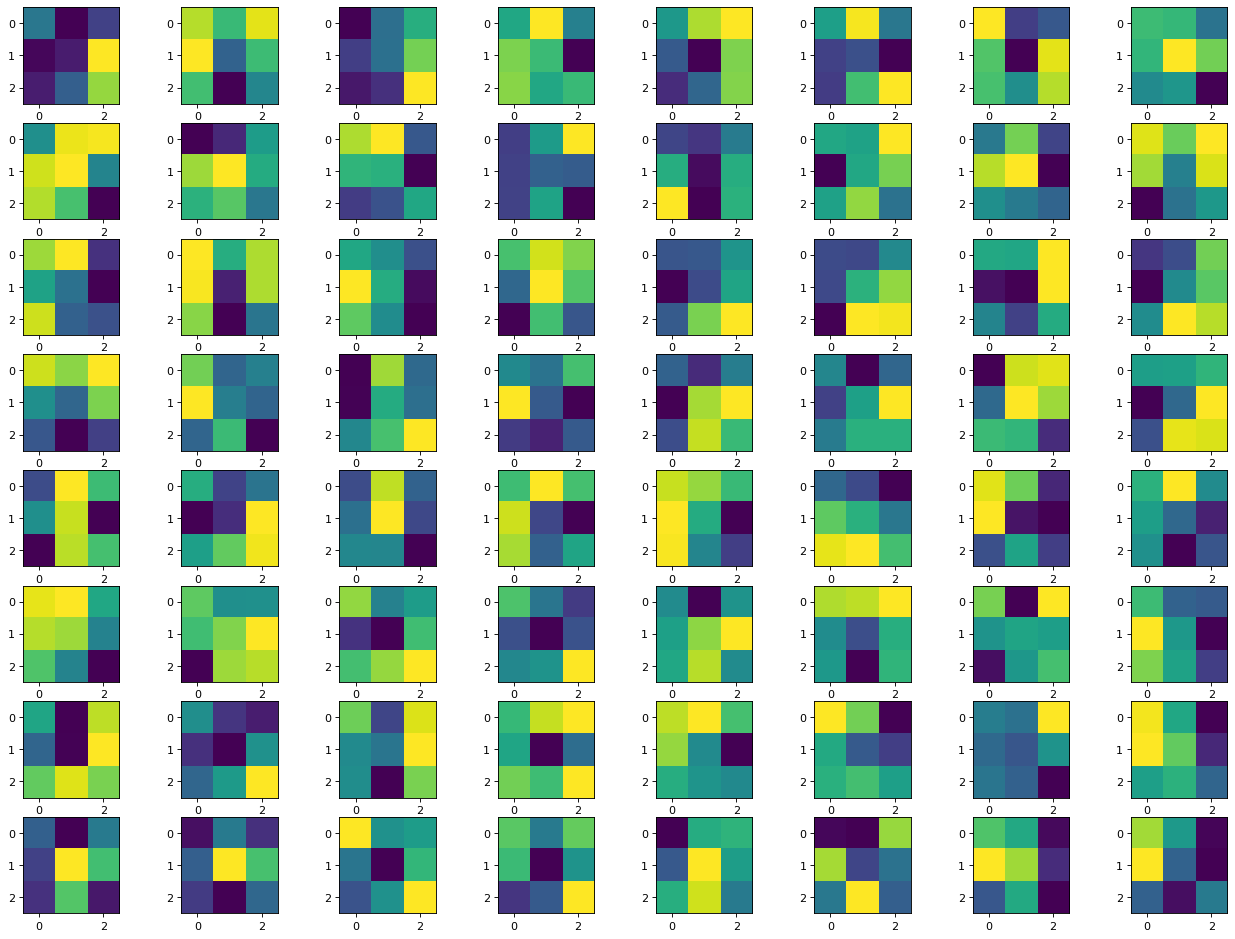

In [ ]:
x = list(N1.layer1.modules())[2].weight.clone().detach().cpu()
fig = plt.figure(figsize=(20,15), dpi=80) 
for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  for j in range(64): 
    ax.imshow(x[i][j])

In [ ]:
one_two = []
one_three = []
for i in range(64) : 
  first = N1.conv1.weight[i].clone().detach().cpu().reshape(-1)
  for j in range(64) : 
    second = N2.conv1.weight[j].clone().detach().cpu().reshape(-1)
    third = N3.conv1.weight[j].clone().detach().cpu().reshape(-1)
    corr1 = np.corrcoef(first , second) 
    corr2 = np.corrcoef(third, first) 
    if (abs(corr1[0,1]) > 0.7 ) : 
      one_two.append([i ,j  , corr1[0,1]]) 
    if (abs(corr2[0,1]) > 0.7 ) : 
      one_three.append([i ,j , corr2[0,1]])

print(one_two)
print(one_three)

[[2, 50, -0.7133881211590014], [4, 52, 0.9041224119890826], [7, 4, 0.7608298479810561], [9, 1, 0.7392530844317977], [9, 53, 0.7203206837477851], [24, 10, -0.830471125765899], [35, 29, 0.70794346378571], [36, 42, 0.7603280617715963], [42, 2, 0.803551743769718], [43, 50, 0.7172724355138931], [47, 55, 0.7200156398741047], [50, 6, 0.8881933088245542], [51, 53, 0.7949149971714771], [54, 53, 0.852298356828197], [57, 20, 0.7764899835266333]]
[[4, 9, -0.7600475965061552], [5, 60, 0.7412587924241084], [9, 53, 0.7852595836684693], [16, 21, 0.7934263356561412], [16, 34, 0.7200407608052314], [19, 49, -0.7140573129209103], [21, 7, -0.8052344197622898], [24, 26, 0.8999877457650965], [24, 45, -0.8330797136237756], [47, 2, 0.8499926737677022], [50, 27, 0.8518467020027999], [50, 44, -0.7633989105245563], [51, 53, 0.7829030505228669], [53, 16, 0.7358053162341471], [54, 53, 0.8455886063120651], [62, 49, 0.7717150630899797]]


In [ ]:
one =[]
for i in range(63) : 
  first = N1.conv1.weight[i].clone().detach().cpu().reshape(-1)
  for j in range(i+1 , 64) : 
    second = N1.conv1.weight[j].clone().detach().cpu().reshape(-1)
    corr1 = np.corrcoef(first , second) 
    if (abs(corr1[0,1]) > 0.7 ) : 
      one.append([i ,j  , corr1[0,1]]) 
print(one)
two =[]
for i in range(63) : 
  first = N2.conv1.weight[i].clone().detach().cpu().reshape(-1)
  for j in range(i+1 , 64) : 
    second = N2.conv1.weight[j].clone().detach().cpu().reshape(-1)
    corr1 = np.corrcoef(first , second) 
    if (abs(corr1[0,1]) > 0.7 ) : 
      two.append([i ,j  , corr1[0,1]]) 
print(two)

three =[]
for i in range(63) : 
  first = N3.conv1.weight[i].clone().detach().cpu().reshape(-1)
  for j in range(i+1 , 64) : 
    second = N3.conv1.weight[j].clone().detach().cpu().reshape(-1)
    corr1 = np.corrcoef(first , second) 
    if (abs(corr1[0,1]) > 0.7 ) : 
      three.append([i ,j  , corr1[0,1]]) 
print(three)

[[9, 51, 0.7063448037194519], [11, 53, 0.7364548140733134], [13, 56, 0.7160671308556215], [51, 54, 0.7938917640632042]]
[[1, 27, 0.7199331993754803], [24, 48, 0.7110070485711596], [37, 55, -0.8014798743169148], [53, 58, 0.7292499170666332]]
[[4, 42, -0.738954838130467], [5, 61, -0.7395500641358093], [16, 53, 0.7475367339141374], [26, 45, -0.7157566634627859]]


In [ ]:
for i in range(64) : 
  first = N2.conv1.weight[i].clone().detach().cpu().reshape(-1)
  for j in range(64) : 
    second = N3.conv1.weight[j].clone().detach().cpu().reshape(-1)
    corr1 = np.corrcoef(first , second) 
    if (abs(corr1[0,1]) > 0.7 ) : 
      print (i ," , " ,j , "value: " , corr1[0,1] )

0  ,  37 value:  -0.7649673148321868
2  ,  37 value:  0.8115623420180261
3  ,  11 value:  -0.806866075227496
8  ,  4 value:  0.7544792767111205
13  ,  6 value:  0.8058623392763551
14  ,  26 value:  0.9130406679559764
21  ,  55 value:  0.8384904784751365
23  ,  47 value:  0.7936667022788607
30  ,  3 value:  0.8640223378794308
31  ,  45 value:  0.913557119561045
33  ,  18 value:  0.7341858504110592
35  ,  2 value:  0.7754339789726231
36  ,  40 value:  -0.9415383242028783
38  ,  58 value:  0.9078996658994629
39  ,  63 value:  -0.9100178152918994
43  ,  63 value:  0.7567653619627354
50  ,  53 value:  0.8281595320112467
55  ,  37 value:  0.7010034384153857
61  ,  61 value:  0.7668975660178021


<BarContainer object of 23 artists>

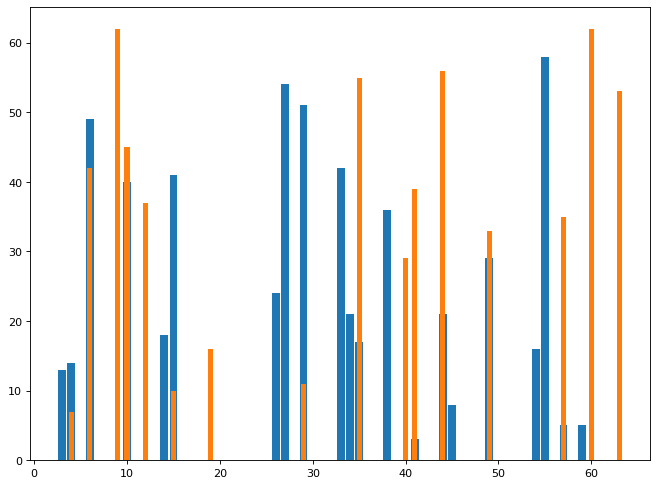

In [ ]:
fig = plt.figure(figsize=(10,7.5), dpi=80) 
ax = fig.add_subplot(111)
ax.bar([x for x,y,z in one_two] , [y for x,y,z in one_two] , width=0.85  )
ax.bar([x for x,y,z in one_three] , [y for x,y,z in one_three] , width=0.55)

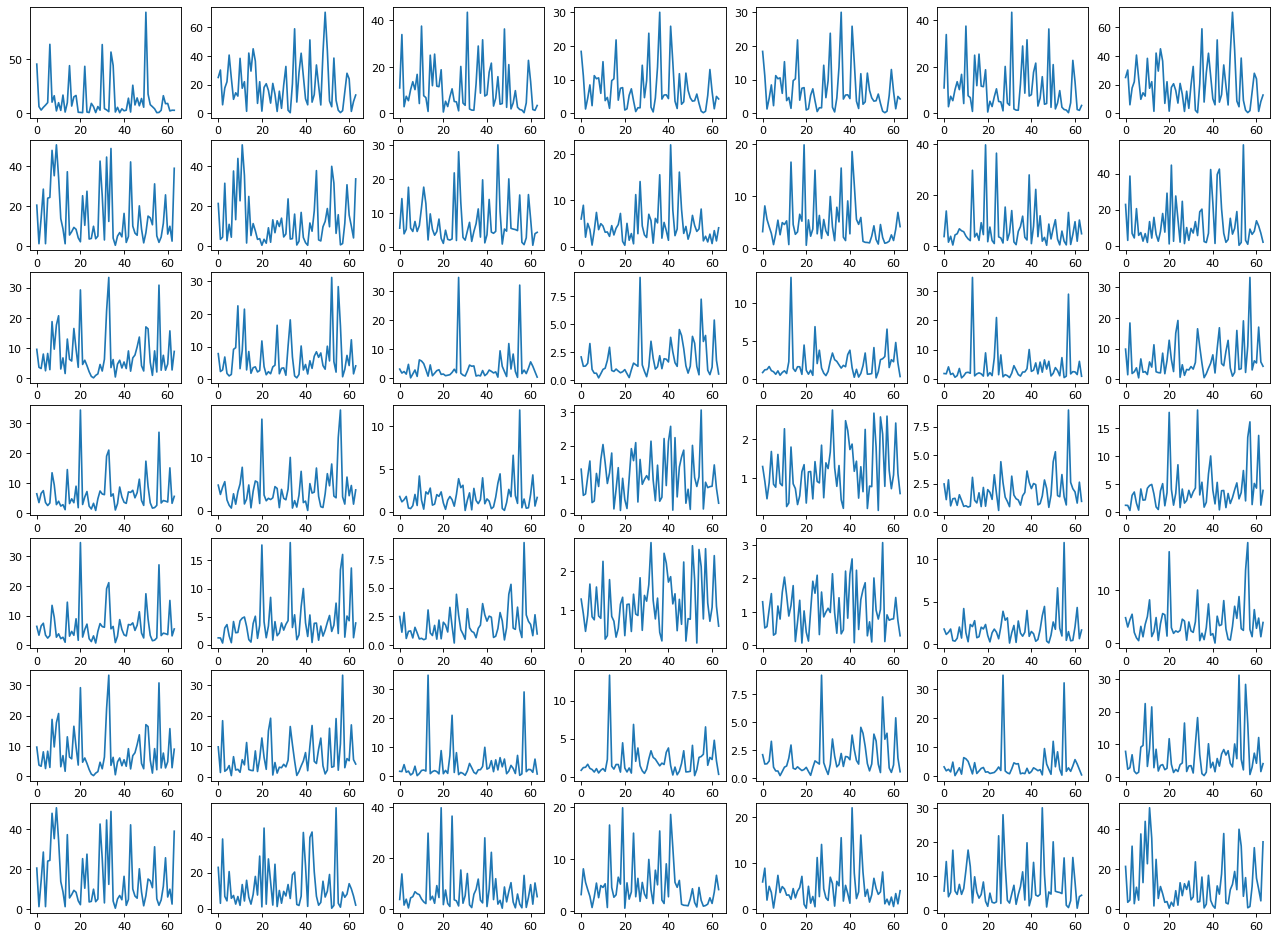

In [ ]:
a = np.zeros([64,7,7])
conv = N1.conv1.weight.clone().detach().cpu()
for i in range(64) : 
  a[i] = conv[i][0]
Y = np.fft.fft2(a)
fig = plt.figure(figsize=(20,15), dpi=80)
Y = np.swapaxes(Y , 0 ,2 )
for i in range (7): 
  for j in range(7): 
    ax = fig.add_subplot(7,7,i*7+ j+1)
    ax.plot(abs(Y[i][j]))
    


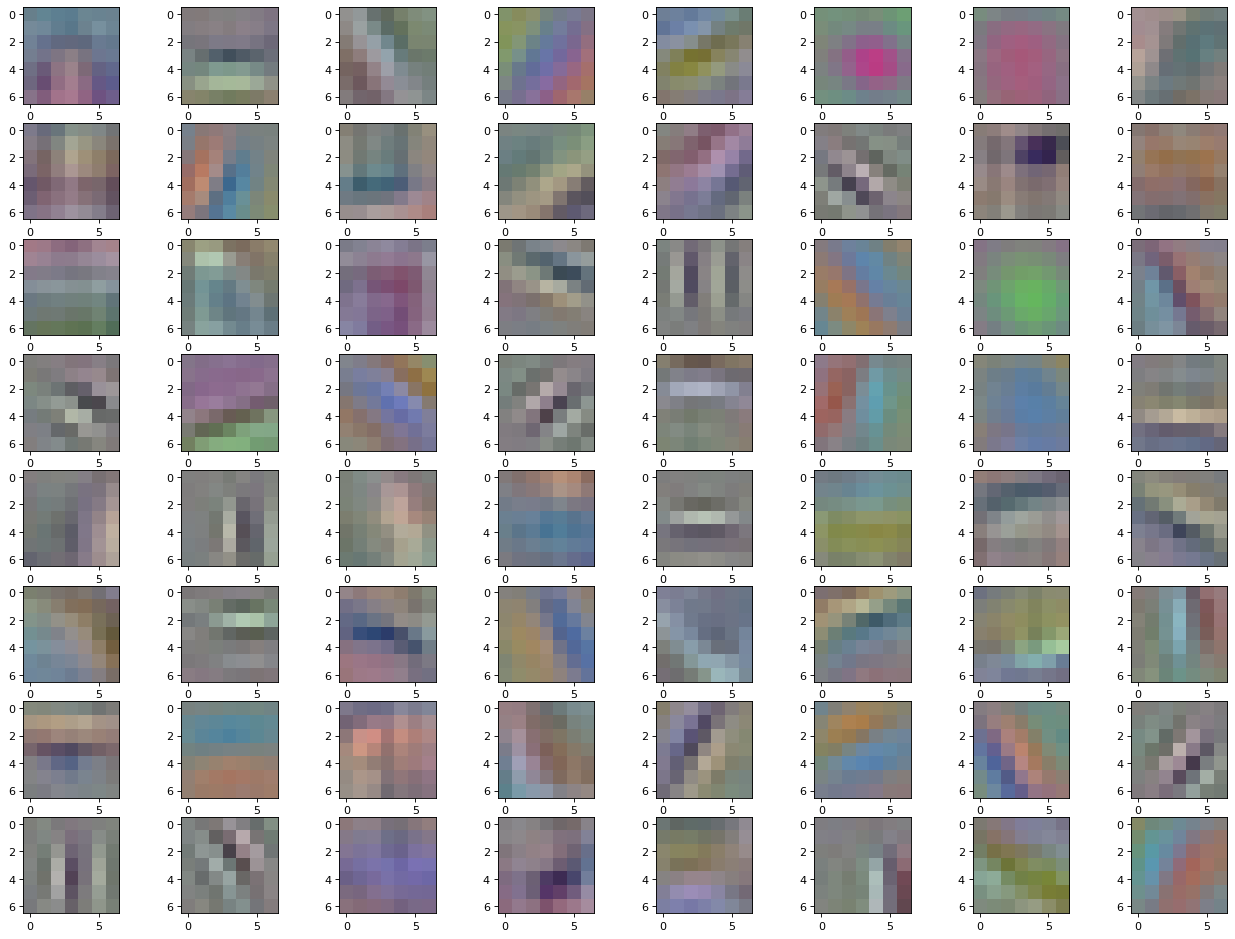

In [ ]:
conv = N1.conv1.weight.clone().detach().cpu()
conv = (conv+10)/20
fig = plt.figure(figsize=(20,15), dpi=80)
for i in range(64) : 
  ax = fig.add_subplot(8,8,i+1)
  a = conv[i][0]
  b = conv[i][1]
  c = conv[i][2]
  d = torch.stack((a,b,c),dim =2)
  ax.imshow(d)